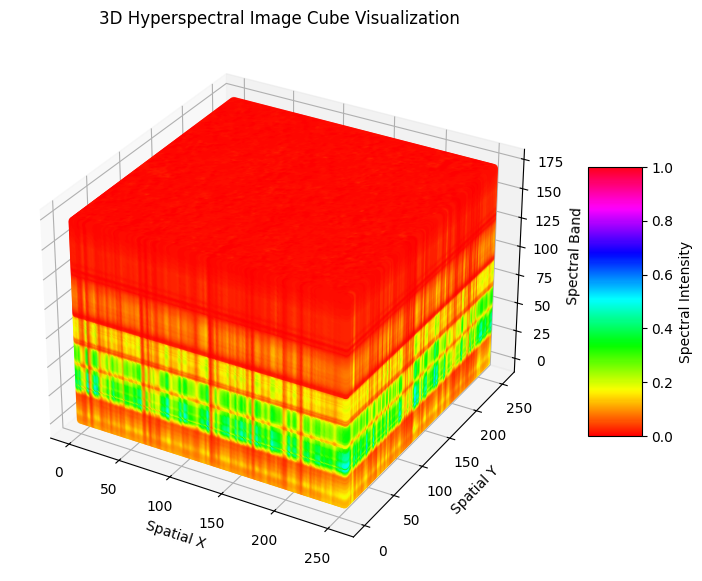

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# This function will create a plot similar to the provided image using a .npy file
def plot_hyperspectral_cube(npy_file_path):
    # Load the hyperspectral data from a .npy file
    data = np.load(npy_file_path)
    data = data[:256,:256,:]
    
    # Check if the data shape matches the expected dimensions
    if data.shape != (256, 256, 172):
        raise ValueError(f"Expected data shape to be (256, 256, 172), but got {data.shape}")

    # Generate x, y, z coordinates for each pixel and spectrum band
    x = np.arange(data.shape[0])
    y = np.arange(data.shape[1])
    z = np.arange(data.shape[2])
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    # Flatten the arrays for plotting
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    Z_flat = Z.flatten()
    C_flat = data.flatten()

    # Normalize the color values to be between 0 and 1
    C_flat_normalized = (C_flat - np.min(C_flat)) / (np.max(C_flat) - np.min(C_flat))

    # Create a figure and a 3D subplot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the cube with spectral data
    img = ax.scatter(X_flat, Y_flat, Z_flat, c=C_flat_normalized, cmap='hsv')

    # Set the labels and title
    ax.set_xlabel('Spatial X')
    ax.set_ylabel('Spatial Y')
    ax.set_zlabel('Spectral Band')
    ax.set_title('3D Hyperspectral Image Cube Visualization')

    # Add a color bar which maps values to colors
    cbar = fig.colorbar(img, shrink=0.5, aspect=5)
    cbar.set_label('Spectral Intensity')

    # Show the plot
    plt.show()

    
import os, glob

dx = glob.glob('../../Fusion_data/train/*GT*')
# print(dx)
# raise
# Path to the .npy file (replace with the actual path of the .npy file)
npy_file_path = dx[0]

# Call the function with the path to your .npy file
plot_hyperspectral_cube(npy_file_path)

In [1]:
# First, we simulate a 256x256x172 HSI cube since we do not have the actual .npy file.
import  numpy as np
# First, we simulate a 256x256x172 HSI cube since we do not have the actual .npy file.
import  numpy as np, glob
# simulated_hsi_data = np.random.rand(256, 256, 172)
dx = glob.glob('../../Fusion_data/train/*GT*')
# print(dx)
# raise
# Path to the .npy file (replace with the actual path of the .npy file)
npy_file_path = dx[0]

simulated_hsi_data = np.load(npy_file_path)
# Now we will use the spectral python (spy) package to display the cube.
# Importing necessary functions from spectral
from spectral import imshow, view_cube

# Using view_cube to visualize the data as a cube.
# Note that 'view_cube' requires an X server to be running and may not work in all environments.
# If it doesn't work here, you would need to run this code on your local machine.
view = view_cube(simulated_hsi_data, bands=[29, 14, 7])
view.show()


/home/jess/anaconda3/envs/pytorch/lib/python3.11/site-packages/spectral/graphics/graphics.py:757: UserWarning: 
There is no current wx.App object - creating one now.
  warnings.warn('\nThere is no current wx.App object - creating one now.',


SystemExit: Unable to access the X Display, is $DISPLAY set properly?

/home/jess/anaconda3/envs/pytorch/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
